In [16]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test /255.0

In [17]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0,len(y_train)), k=16)

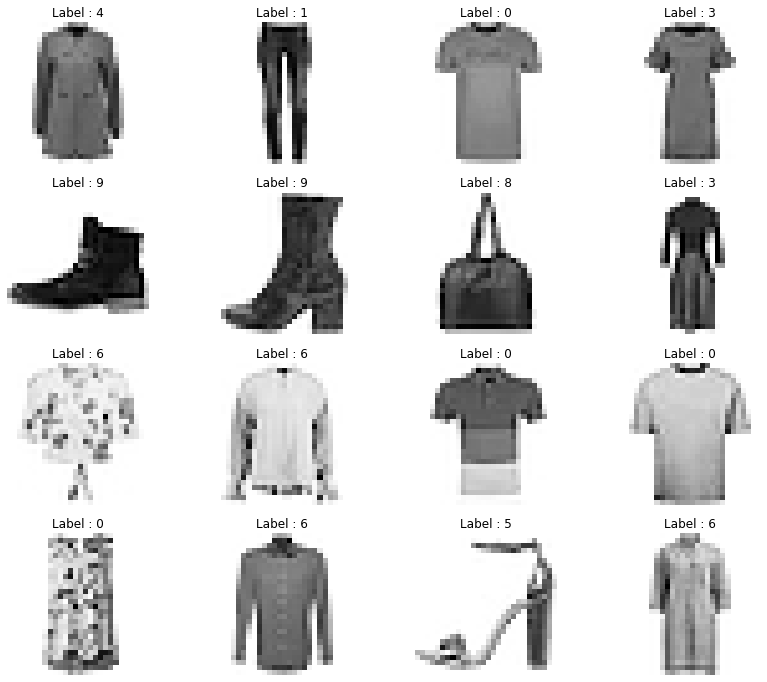

In [18]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation="nearest")
    plt.title('Label : ' + str(y_train[n]) )
    plt.axis('off')

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [21]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4855 - accuracy: 0.8290 - val_loss: 0.4041 - val_accuracy: 0.8531
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3644 - accuracy: 0.8692 - val_loss: 0.3806 - val_accuracy: 0.8613
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3228 - accuracy: 0.8810 - val_loss: 0.3505 - val_accuracy: 0.8715
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2970 - accuracy: 0.8914 - val_loss: 0.3601 - val_accuracy: 0.8677
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2802 - accuracy: 0.8952 - val_loss: 0.3289 - val_accuracy: 0.8829
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2629 - accuracy: 0.9024 - val_loss: 0.3324 - val_accuracy: 0.8799
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2516 - accuracy: 0.9063 - val_loss: 0.3138 - val_accuracy: 0.8895
Epoch 

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

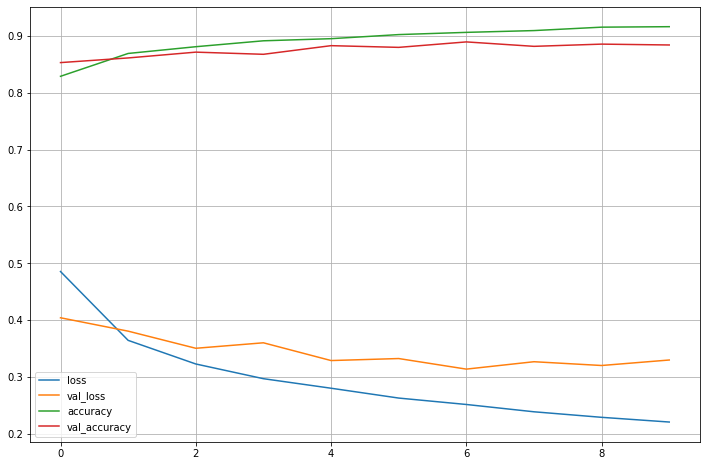

In [23]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [25]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8841
Test loss : 0.3298344016075134
Test accuracy : 0.8841000199317932


In [26]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

In [27]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [28]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

1159

In [29]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[7910,
 1706,
 378,
 3466,
 6649,
 7303,
 9398,
 42,
 541,
 2507,
 4159,
 4079,
 7032,
 7314,
 4049,
 6079]

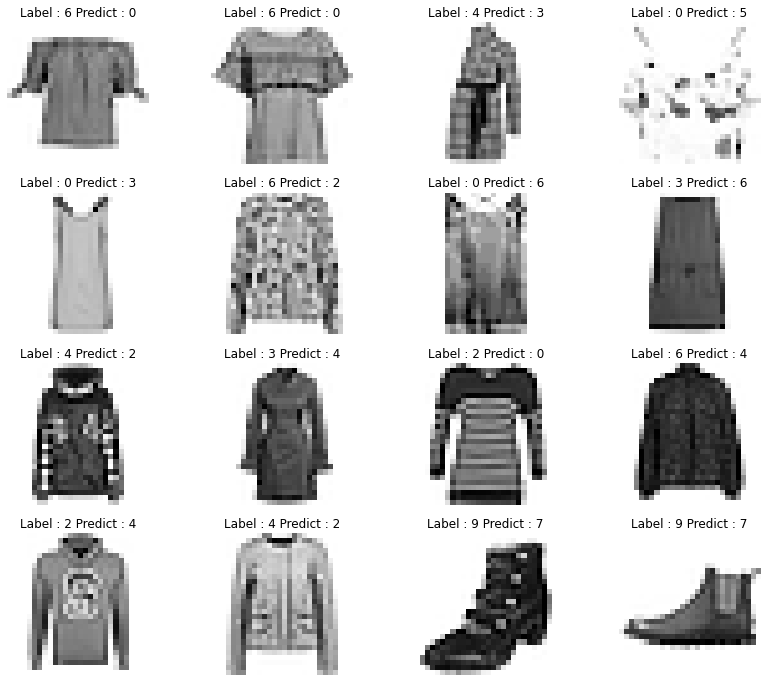

In [30]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

In [9]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [7]:
import time

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data = (X_test, y_test))
print("fit time : ", time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1494 - accuracy: 0.9441 - val_loss: 0.2348 - val_accuracy: 0.9170
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1270 - accuracy: 0.9514 - val_loss: 0.2427 - val_accuracy: 0.9228
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1103 - accuracy: 0.9582 - val_loss: 0.2452 - val_accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0959 - accuracy: 0.9634 - val_loss: 0.2771 - val_accuracy: 0.9198
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0831 - accuracy: 0.9688 - val_loss: 0.2901 - val_accuracy: 0.9212
fit time :  210.9218156337738


In [10]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2901 - accuracy: 0.9212
Test loss : 0.2901213765144348
Test accuracy : 0.9211999773979187
